# Bank Note Authentication

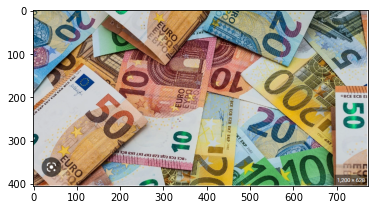

In [48]:
import matplotlib.image as mpimg
money_img = mpimg.imread('money.png')                                                                     
plt.imshow(money_img);

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

## Read the data 

In [50]:
d = pd.read_csv('BankNote_Authentication.csv.xls')
df = d.copy()

## Gain insight of the data 

In [51]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [52]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [53]:
df.shape

(1372, 5)

In [54]:
df.size

6860

## Information of dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### Observation
* There are total 5 columns and each columns having 1372 entries
* Total instances are 6860
* Dtype are (float, integer)

## Checking for the null values

In [56]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

#### Observation
* there are no null values in the data sets

In [57]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

## Univariate Analysis

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

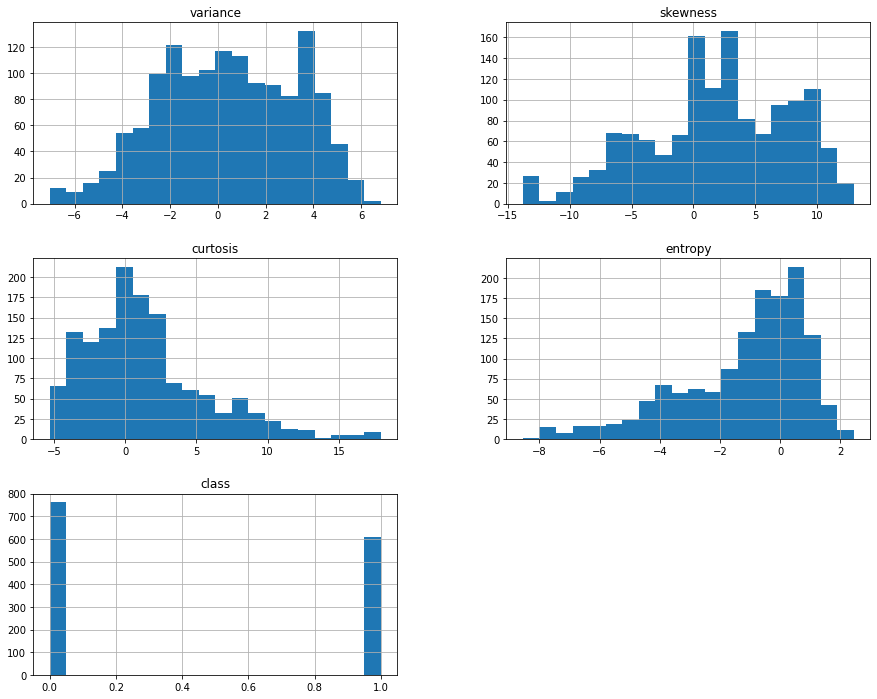

In [58]:
df.hist(bins=20,figsize=(15,12))

### Observation 
*  Ploted the histogram to visualize the distribution of data and it's also used to detect the outliers and to see the skewness of the data
*  As we can see that curtosis and entropy are Skewed data and contain outliers 

## Statistical information 

In [59]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Bivariate Analysis

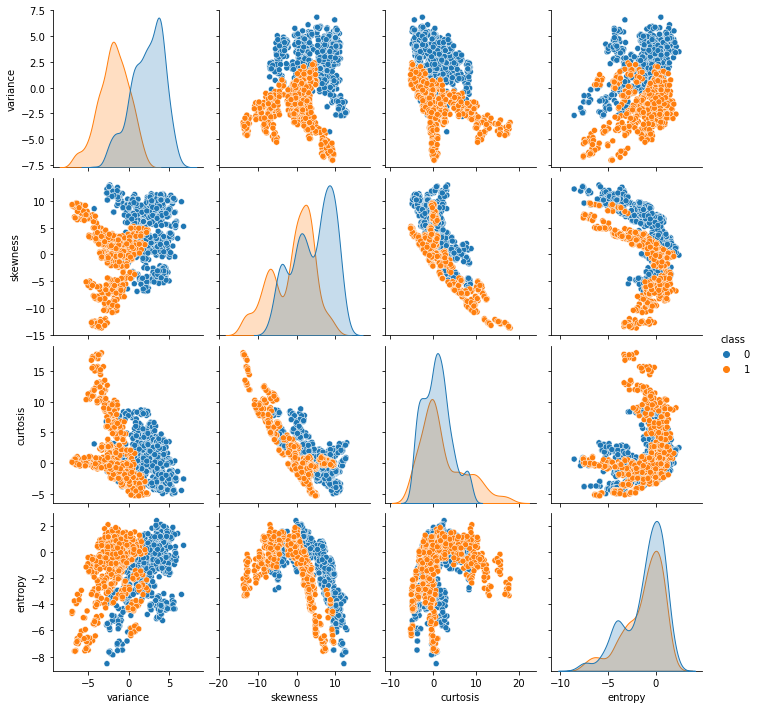

In [60]:
sns.pairplot (df, hue = 'class')

In [61]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

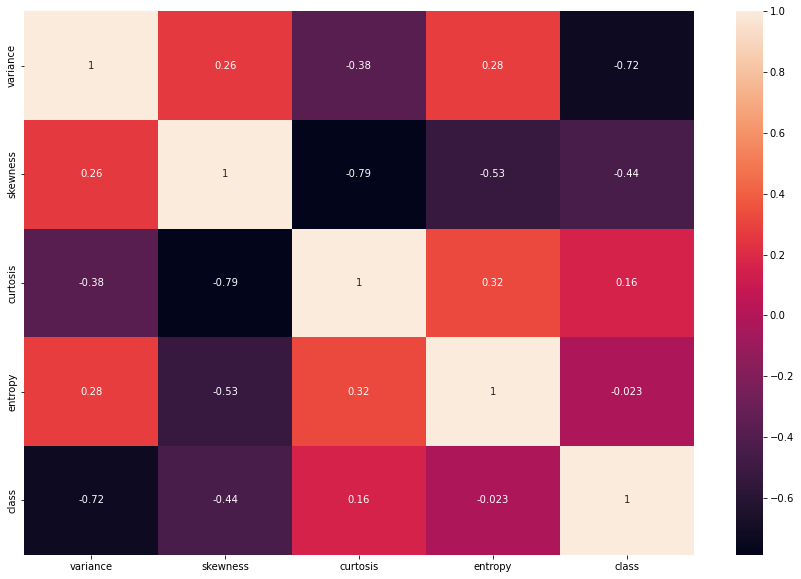

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [63]:
##  

## outliers handling
#### Ploted the boxplot to check the outliers variance 

<AxesSubplot:xlabel='curtosis'>

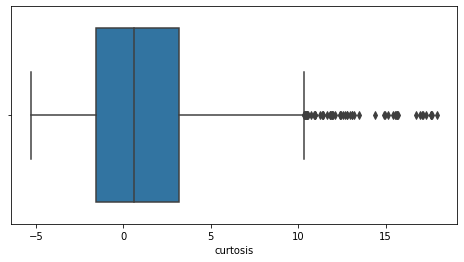

In [64]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'curtosis', data=df,orient='h')

<AxesSubplot:xlabel='entropy'>

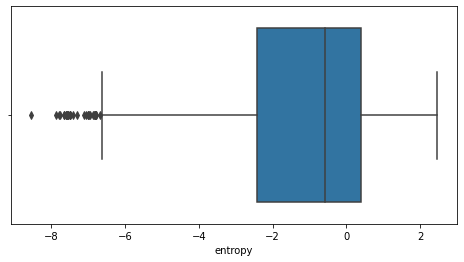

In [65]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'entropy', data=df,orient='h')

## Inter Quartile Range

In [66]:
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object and colname!='class':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

<AxesSubplot:xlabel='entropy'>

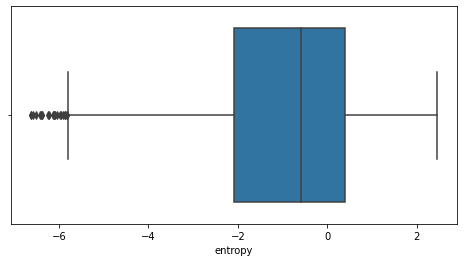

In [67]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'entropy', data=df,orient='h')

<AxesSubplot:xlabel='curtosis'>

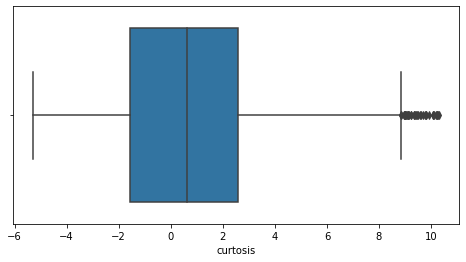

In [68]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'curtosis', data=df,orient='h')

#### Observation 
* The outliers has been compriesd with the help of inter quartile range 
* The outliers have filled with the median value 

## Visual of label which will define note is real or fake

<AxesSubplot:xlabel='class', ylabel='count'>

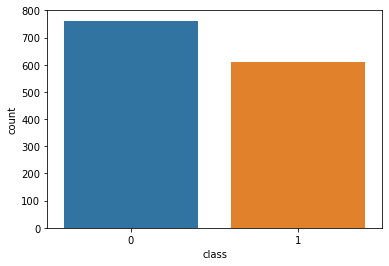

In [69]:
sns.countplot(df['class'])

#### Observation 
* the data is distributed in 0 and 1
* the 0 are fake and 1 is consider as real 

## The model is ready for machine learning algorithms

### The training set is used to train the machine learning algorithms while the test set is used to evaluate the performance of the machine learning algorithms.

In [70]:
X = df.drop(['class'],axis=1)
y = df['class']

### Splitting the data into train and test

In [71]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

***

Import all machine Learning Algorithm

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [73]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
clf_knn =  KNeighborsClassifier(n_neighbors=5)
clf_svc = SVC(kernel='linear')
clf_forest = RandomForestClassifier(criterion='entropy',random_state=42)
clf_ada = AdaBoostClassifier(random_state=42)
clf_bagging = BaggingClassifier()
clf_gnb = GaussianNB()
clf_grad=GradientBoostingClassifier()

In [74]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True,test=True):
    # Fit training data with model
    clf.fit(x_train,y_train)
    # print the accuracy score, classification report and confusion matrix of classifier
    # training performance
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(x_train))))
    print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(x_train))))
    print("Confusion Matrix for training: \n")
    cnf_metrix_train=confusion_matrix(y_train, clf.predict(x_train))
    sns.heatmap(pd.DataFrame(cnf_metrix_train),annot=True ,fmt='g')
    plt.title('Confusion matrix for Training')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    res= cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training Average Accuracy: \t {0:.4f}".format(np.mean(res)))
    print("Training Accuracy SD: \t\t {0:.4f}\n\n".format(np.std(res)))

    # test performance
    print("Test Result:\n\n")
    acc=accuracy_score(y_test, clf.predict(x_test))
    print("accuracy score:",acc)
    print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(x_test))))
    print("Confusion Matrix for testing: \n")
    cnf_metrix_test=confusion_matrix(y_test, clf.predict(x_test))    
    sns.heatmap(pd.DataFrame(cnf_metrix_test), annot=True ,fmt='g')
    plt.title('Confusion matrix for Testing')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label') 
    
    res_test= cross_val_score(clf, x_test, y_test, cv=10, scoring='accuracy')
    print("Testing Average Accuracy: \t {0:.4f}".format(np.mean(res_test)))
    print("Testing Accuracy SD: \t\t {0:.4f}\n\n".format(np.std(res_test)))
        

In [76]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Gradient Boost', 'Naive']
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_grad: 'Gradient Boost',
          clf_gnb: 'Naive'}

# Logistic Regression

Train Result:

accuracy score: 0.9973

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       0.99      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



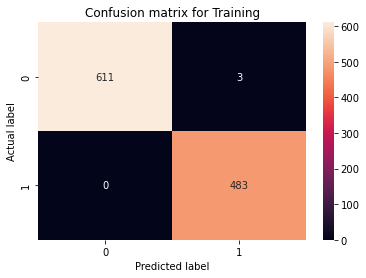

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9964


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0045


Test Result:


accuracy score: 0.9818181818181818
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       148
           1       0.98      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9890


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0236




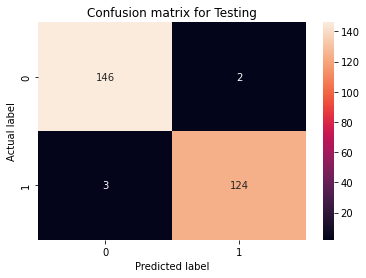

In [77]:
print_score(clf_logreg, x_train, y_train, x_test, y_test, train=True,test=True)

***

# Decision Tree

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



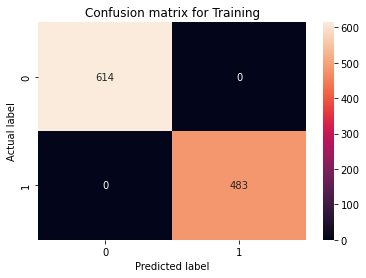

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9827


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0064


Test Result:


accuracy score: 0.9854545454545455
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9602


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0339




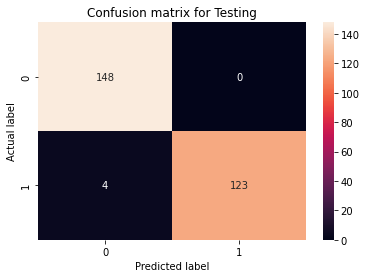

In [78]:
print_score(clf_tree, x_train, y_train, x_test, y_test, train=True,test=True)

***

# support vector machine

Train Result:

accuracy score: 0.9991

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



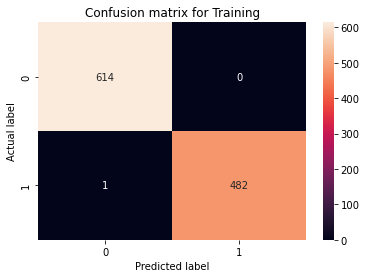

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9982


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0037


Test Result:


accuracy score: 0.9854545454545455
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9745


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0284




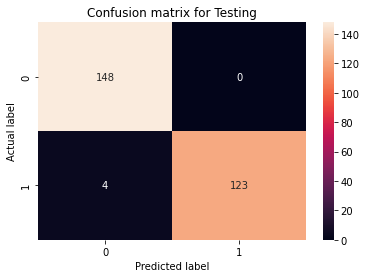

In [79]:
print_score(clf_svc, x_train, y_train, x_test, y_test, train=True,test=True)

***

# KNN

Train Result:

accuracy score: 0.9991

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



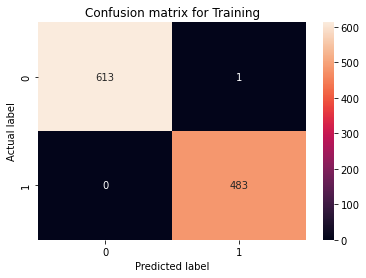

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9991


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0027


Test Result:


accuracy score: 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9854


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0291




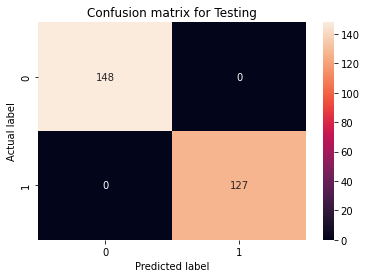

In [80]:
print_score(clf_knn, x_train, y_train, x_test, y_test, train=True,test=True)

***

# Random Forest classifier

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



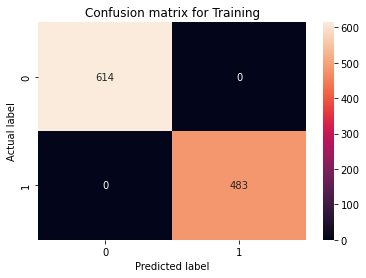

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9900


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0064


Test Result:


accuracy score: 0.9927272727272727
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9892


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0230




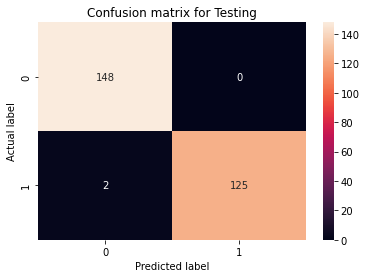

In [81]:
print_score(clf_forest, x_train, y_train, x_test, y_test, train=True,test=True)

***

# Naive Bayes

Train Result:

accuracy score: 0.8715

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       614
           1       0.86      0.84      0.85       483

    accuracy                           0.87      1097
   macro avg       0.87      0.87      0.87      1097
weighted avg       0.87      0.87      0.87      1097


Confusion Matrix for training: 



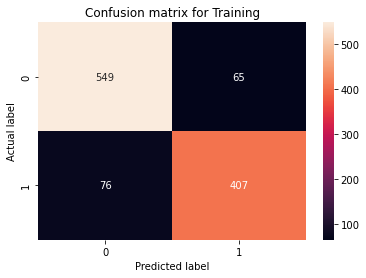

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.8623


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0305


Test Result:


accuracy score: 0.8181818181818182
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       148
           1       0.86      0.72      0.79       127

    accuracy                           0.82       275
   macro avg       0.83      0.81      0.81       275
weighted avg       0.82      0.82      0.82       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.8438


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0770




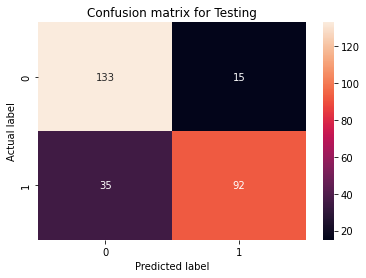

In [82]:
print_score(clf_gnb, x_train, y_train, x_test, y_test, train=True,test=True)

# Ensemble Techniques

# BaggingClassifier

Train Result:

accuracy score: 0.9973

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       0.99      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



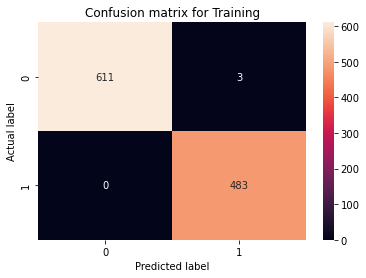

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9854


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0116


Test Result:


accuracy score: 0.9963636363636363
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       148
           1       1.00      0.99      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9817


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0247




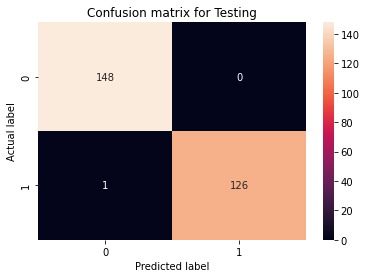

In [83]:
print_score(clf_bagging, x_train, y_train, x_test, y_test, train=True,test=True)

***

# AdaBoostClassifier

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



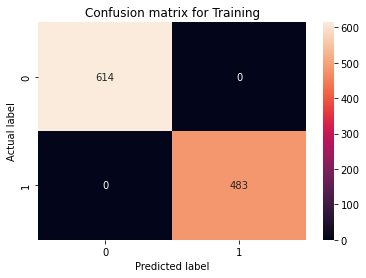

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9964


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0060


Test Result:


accuracy score: 0.9927272727272727
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9890


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0168




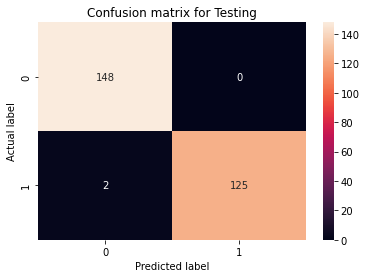

In [84]:
print_score(clf_ada, x_train, y_train, x_test, y_test, train=True,test=True)

***

# GradientBoostingClassifier

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097


Confusion Matrix for training: 



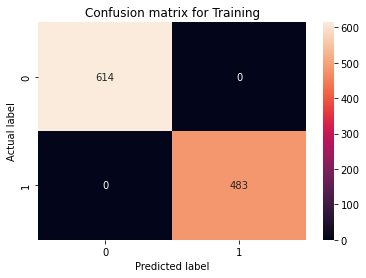

<IPython.core.display.Javascript object>

Training Average Accuracy: 	 0.9927


<IPython.core.display.Javascript object>

Training Accuracy SD: 		 0.0055


Test Result:


accuracy score: 1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275


Confusion Matrix for testing: 



<IPython.core.display.Javascript object>

Testing Average Accuracy: 	 0.9892


<IPython.core.display.Javascript object>

Testing Accuracy SD: 		 0.0230




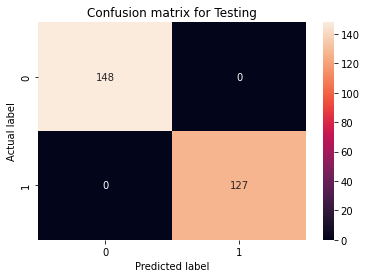

In [85]:
print_score(clf_grad, x_train, y_train, x_test, y_test, train=True,test=True)

***

|Classification| Logistic | Decision Tree | SVM| KNN |Random Forest | Naive Bayes| Bagging | Adaboosta | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| :- |:-|
| Training Accuracy | 99.64 | 98.27 | 99.82 | 99.91 |99 |86.23 | 98.36 | 99.64 | 99.36 |
| Testing Accuracy | 98.90 | 96.02 | 97.40 | 98.54 |98.92 |84.38 | 97.54 | 98.990 | 98.92 |

***

# Predicting values from Model using same dataset

In [86]:
#Actual value and the predicted value
clf_diff= pd.DataFrame({'Actual value': y_test, 'Predicted value': clf_ada.predict(x_test)})
clf_diff.head(30)

,Actual value,Predicted value
430,0,0
588,0,0
296,0,0
184,0,0
244,0,0
590,0,0
78,0,0
708,0,0
411,0,0
43,0,0


***

# predictions for new Data

In [87]:
# generating predictions for new Data
l=[(3.8,8.8,-3.0,-0.50)]
i=np.array(l)
y_pred = clf_ada.predict(i)
# creating table with test & predicted for test
print('predictions for new Data :',y_pred)

<IPython.core.display.Javascript object>

predictions for new Data : [0]


***

## *Conclusion 
#### AdaboostaClassifier is giving the best accuracy 98.99% 

# ♡ Thank you for taking the time ♡